<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/Assignment6/Chicago_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/content/drive/MyDrive/Chicago_Crimes_2012_to_2017.csv")
df.head()

Unnamed: 0        ID Case Number                    Date  \
0           3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1          89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2         197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3         673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4         911  10508699    HZ250455  05/03/2016 10:00:00 PM   

                 Block  IUCR            Primary Type              Description  \
0   013XX S SAWYER AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1   061XX S DREXEL AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
3    049XX W FULTON ST  0460                 BATTERY                   SIMPLE   
4    003XX N LOTUS AVE  0820                   THEFT           $500 AND UNDER   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True  ...  24.0            29.0       08B   
1            RESIDENCE   False  ...  20.0            42.0       08B   
2               STREET   False  ...  37.0            25.0        24   
3             SIDEWALK   False  ...  28.0            25.0       08B   
4            RESIDENCE   False  ...  28.0            25.0        06   

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  41.864073   
1     1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM  41.782922   
2     1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  41.894908   
3     1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  41.885687   
4     1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  41.886297   

   Longitude                       Location  
0 -87.706819  (41.864073157, -87.706818608)  
1 -87.604363   (41.782921527, -87.60436317)  
2 -87.758372  (41.894908283, -87.758371958)  
3 -87.749516  (41.885686845, -87.749515983)  
4 -87.761751  (41.886297242, -87.761750709)  

[5 rows x 23 columns]

In [3]:
df.drop(labels=['Case Number','ID', 'Block', 'Ward', 'Community Area', 'FBI Code', 'Year', 'Updated On',
                 'Latitude','Longitude', 'Beat'] , inplace=True, axis=1)
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)
df.head()

Unnamed: 0                Date  IUCR  \
Date                                                        
2016-05-03 23:40:00           3 2016-05-03 23:40:00  0486   
2016-05-03 21:40:00          89 2016-05-03 21:40:00  0486   
2016-05-03 23:31:00         197 2016-05-03 23:31:00  0470   
2016-05-03 22:10:00         673 2016-05-03 22:10:00  0460   
2016-05-03 22:00:00         911 2016-05-03 22:00:00  0820   

                               Primary Type              Description  \
Date                                                                   
2016-05-03 23:40:00                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 21:40:00                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 23:31:00  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
2016-05-03 22:10:00                 BATTERY                   SIMPLE   
2016-05-03 22:00:00                   THEFT           $500 AND UNDER   

                    Location Description  Arrest  Domestic  District  \
Date                                                                   
2016-05-03 23:40:00            APARTMENT    True      True      10.0   
2016-05-03 21:40:00            RESIDENCE   False      True       3.0   
2016-05-03 23:31:00               STREET   False     False      15.0   
2016-05-03 22:10:00             SIDEWALK   False     False      15.0   
2016-05-03 22:00:00            RESIDENCE   False      True      15.0   

                     X Coordinate  Y Coordinate                       Location  
Date                                                                            
2016-05-03 23:40:00     1154907.0     1893681.0  (41.864073157, -87.706818608)  
2016-05-03 21:40:00     1183066.0     1864330.0   (41.782921527, -87.60436317)  
2016-05-03 23:31:00     1140789.0     1904819.0  (41.894908283, -87.758371958)  
2016-05-03 22:10:00     1143223.0     1901475.0  (41.885686845, -87.749515983)  
2016-05-03 22:00:00     1139890.0     1901675.0  (41.886297242, -87.761750709)

In [4]:
df[['X Coordinate', 'Y Coordinate']] = df[['X Coordinate', 'Y Coordinate']].replace(0, np.nan)
df.dropna()

Unnamed: 0                Date  IUCR  \
Date                                                        
2016-05-03 23:40:00           3 2016-05-03 23:40:00  0486   
2016-05-03 21:40:00          89 2016-05-03 21:40:00  0486   
2016-05-03 23:31:00         197 2016-05-03 23:31:00  0470   
2016-05-03 22:10:00         673 2016-05-03 22:10:00  0460   
2016-05-03 22:00:00         911 2016-05-03 22:00:00  0820   
...                         ...                 ...   ...   
2016-05-03 23:33:00     6250330 2016-05-03 23:33:00  0486   
2016-05-03 23:30:00     6251089 2016-05-03 23:30:00  1310   
2016-05-03 00:15:00     6251349 2016-05-03 00:15:00  041A   
2016-05-03 21:07:00     6253257 2016-05-03 21:07:00  0486   
2016-05-03 23:38:00     6253474 2016-05-03 23:38:00  5007   

                               Primary Type              Description  \
Date                                                                   
2016-05-03 23:40:00                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 21:40:00                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 23:31:00  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
2016-05-03 22:10:00                 BATTERY                   SIMPLE   
2016-05-03 22:00:00                   THEFT           $500 AND UNDER   
...                                     ...                      ...   
2016-05-03 23:33:00                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 23:30:00         CRIMINAL DAMAGE              TO PROPERTY   
2016-05-03 00:15:00                 BATTERY      AGGRAVATED: HANDGUN   
2016-05-03 21:07:00                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 23:38:00           OTHER OFFENSE  OTHER WEAPONS VIOLATION   

                               Location Description  Arrest  Domestic  \
Date                                                                    
2016-05-03 23:40:00                       APARTMENT    True      True   
2016-05-03 21:40:00                       RESIDENCE   False      True   
2016-05-03 23:31:00                          STREET   False     False   
2016-05-03 22:10:00                        SIDEWALK   False     False   
2016-05-03 22:00:00                       RESIDENCE   False      True   
...                                             ...     ...       ...   
2016-05-03 23:33:00                       APARTMENT    True      True   
2016-05-03 23:30:00                       APARTMENT    True      True   
2016-05-03 00:15:00                        SIDEWALK   False     False   
2016-05-03 21:07:00                        SIDEWALK   False      True   
2016-05-03 23:38:00  PARKING LOT/GARAGE(NON.RESID.)    True     False   

                     District  X Coordinate  Y Coordinate  \
Date                                                        
2016-05-03 23:40:00      10.0     1154907.0     1893681.0   
2016-05-03 21:40:00       3.0     1183066.0     1864330.0   
2016-05-03 23:31:00      15.0     1140789.0     1904819.0   
2016-05-03 22:10:00      15.0     1143223.0     1901475.0   
2016-05-03 22:00:00      15.0     1139890.0     1901675.0   
...                       ...           ...           ...   
2016-05-03 23:33:00      10.0     1159105.0     1888300.0   
2016-05-03 23:30:00       7.0     1175230.0     1856183.0   
2016-05-03 00:15:00       8.0     1161027.0     1862810.0   
2016-05-03 21:07:00       4.0     1197261.0     1850727.0   
2016-05-03 23:38:00       3.0     1178696.0     1855324.0   

                                          Location  
Date                                                
2016-05-03 23:40:00  (41.864073157, -87.706818608)  
2016-05-03 21:40:00   (41.782921527, -87.60436317)  
2016-05-03 23:31:00  (41.894908283, -87.758371958)  
2016-05-03 22:10:00  (41.885686845, -87.749515983)  
2016-05-03 22:00:00  (41.886297242, -87.761750709)  
...                                            ...  
2016-05-03 23:33:00   (41.849222028, -87.69155551)  
2016-05-03 23:30:00   (41.760743949, -87.63333531)  
2016-05-03 00:15

In [8]:
df.drop("Date", axis=1, inplace=True)
df.head()


Unnamed: 0  IUCR            Primary Type  \
Date                                                            
2016-05-03 23:40:00           3  0486                 BATTERY   
2016-05-03 21:40:00          89  0486                 BATTERY   
2016-05-03 23:31:00         197  0470  PUBLIC PEACE VIOLATION   
2016-05-03 22:10:00         673  0460                 BATTERY   
2016-05-03 22:00:00         911  0820                   THEFT   

                                 Description Location Description  Arrest  \
Date                                                                        
2016-05-03 23:40:00  DOMESTIC BATTERY SIMPLE            APARTMENT    True   
2016-05-03 21:40:00  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
2016-05-03 23:31:00         RECKLESS CONDUCT               STREET   False   
2016-05-03 22:10:00                   SIMPLE             SIDEWALK   False   
2016-05-03 22:00:00           $500 AND UNDER            RESIDENCE   False   

                     Domestic  District  X Coordinate  Y Coordinate  \
Date                                                                  
2016-05-03 23:40:00      True      10.0     1154907.0     1893681.0   
2016-05-03 21:40:00      True       3.0     1183066.0     1864330.0   
2016-05-03 23:31:00     False      15.0     1140789.0     1904819.0   
2016-05-03 22:10:00     False      15.0     1143223.0     1901475.0   
2016-05-03 22:00:00      True      15.0     1139890.0     1901675.0   

                                          Location  
Date                                                
2016-05-03 23:40:00  (41.864073157, -87.706818608)  
2016-05-03 21:40:00   (41.782921527, -87.60436317)  
2016-05-03 23:31:00  (41.894908283, -87.758371958)  
2016-05-03 22:10:00  (41.885686845, -87.749515983)  
2016-05-03 22:00:00  (41.886297242, -87.761750709)

#Exploratory Data Analysis

In [5]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (17.8 MB)
  Preparing metadata (setup.py) ... done


In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Chicago_Crimes', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Build Models

In [13]:
df.groupby('Primary Type').size().sort_values(ascending=False)

Primary Type
THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING         

<Axes: xlabel='X Coordinate', ylabel='Y Coordinate'>

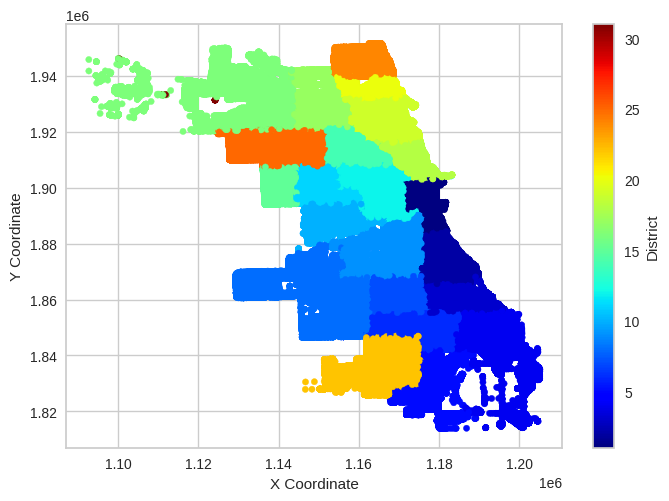

In [14]:
df.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', c='District', cmap=plt.get_cmap('jet'))

<Figure size 1200x1200 with 0 Axes>

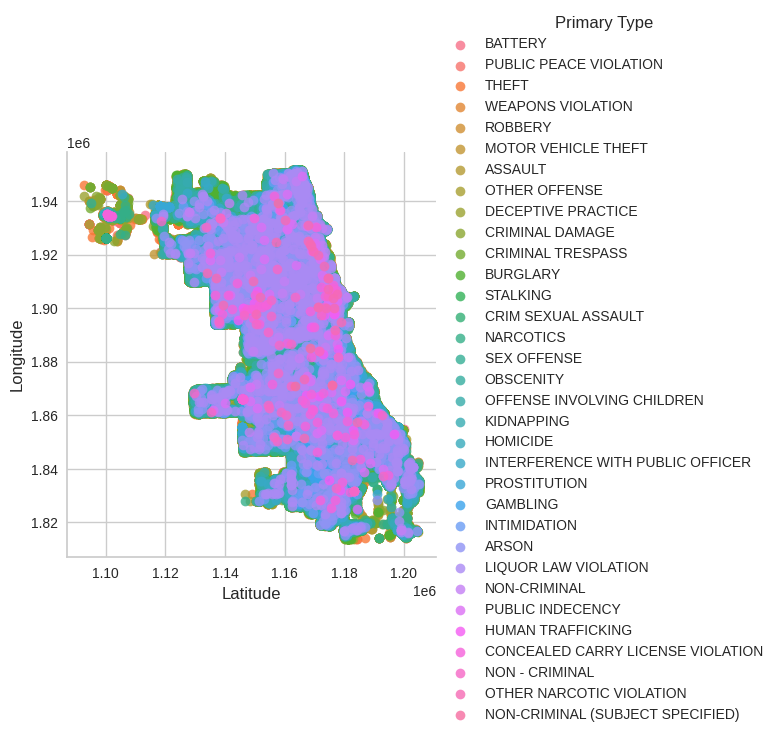

In [17]:
plt.figure(figsize=(12,12))
sns.lmplot(x='X Coordinate', y='Y Coordinate', hue='Primary Type', data=df, fit_reg=False)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
